In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
print("hello")

In [ ]:
#LeNet



#CIFAR10 Dataset
#Training and Testing dataset/loader, from source [1]
trainset = torchvision.datasets.CIFAR10(root='../../data', train = True, transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()]), download = True)

testset = torchvision.datasets.CIFAR10(root='../../data', train = False, transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()]))

#loader
trainloader = torch.utils.data.DataLoader(dataset = trainset, batch_size = 4, shuffle = True)

testloader = torch.utils.data.DataLoader(dataset = testset, batch_size = 4, shuffle = False)

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Network, implementation carried out by myself
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        self.pool1 = nn.AvgPool2d(2 , 2)

        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.pool2 = nn.AvgPool2d(2 , 2)
    
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool1(torch.tanh(self.conv1(x)))
        x = self.pool2(torch.tanh(self.conv2(x)))
        
        x = x.view(x.size(0), 16*5*5)
        
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

#pushing network to device (GPU) from source [2]
lenet = Net().to(device)
#End of source [2]
#source [2] : https://stackoverflow.com/questions/50954479/using-cuda-with-pytorch
print("hello")
#End of source [1] 
#source [1] : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#what-about-data


In [3]:
#Initialising optimiser, learning rate, from source [1]

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(lenet.parameters(), lr=0.001, momentum = 0.9)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(lenet.parameters(), lr=0.01, momentum = 0.9)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(lenet.parameters(), lr=0.0001, momentum = 0.9)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.ADAM(lenet.parameters(), lr=0.001)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSProp(lenet.parameters(), lr=0.001)

#End of source [1] 
#source [1] : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#what-about-data

In [4]:
#Training LeNet-5
lossArrayLE = []
#Array used to plot graph, plotting at each epoch.

#Training network, from source [1]
for epoch in range(25):  # loop over the dataset 25 times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        print(labels)
        # forward + backward + optimize
        outputs = lenet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics, altered by me to print the first training loss
        # and add certain results to an array for plotting.
        running_loss += loss.item()
        if epoch == 0 and i == 1:
          print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i, running_loss / 2))
          lossArrayLE.append(running_loss/2)
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            if i == 11999:
              lossArrayLE.append(running_loss/2000)
            running_loss = 0.0

print('Finished Training')
#End of source [1] 
#source [1] : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#what-about-data

print(lossArrayLE)

[1,     1] loss: 2.312
[1,  2000] loss: 2.222
[1,  4000] loss: 1.951
[1,  6000] loss: 1.832
[1,  8000] loss: 1.745
[1, 10000] loss: 1.701
[1, 12000] loss: 1.610
[2,  2000] loss: 1.585
[2,  4000] loss: 1.563
[2,  6000] loss: 1.507
[2,  8000] loss: 1.508
[2, 10000] loss: 1.478
[2, 12000] loss: 1.440
[3,  2000] loss: 1.413
[3,  4000] loss: 1.387
[3,  6000] loss: 1.413
[3,  8000] loss: 1.367
[3, 10000] loss: 1.368
[3, 12000] loss: 1.358
[4,  2000] loss: 1.314
[4,  4000] loss: 1.308
[4,  6000] loss: 1.298
[4,  8000] loss: 1.296
[4, 10000] loss: 1.299
[4, 12000] loss: 1.303
[5,  2000] loss: 1.247
[5,  4000] loss: 1.247
[5,  6000] loss: 1.270
[5,  8000] loss: 1.239
[5, 10000] loss: 1.249
[5, 12000] loss: 1.229
[6,  2000] loss: 1.187
[6,  4000] loss: 1.200
[6,  6000] loss: 1.203
[6,  8000] loss: 1.206
[6, 10000] loss: 1.200
[6, 12000] loss: 1.198
[7,  2000] loss: 1.136
[7,  4000] loss: 1.165
[7,  6000] loss: 1.165
[7,  8000] loss: 1.168
[7, 10000] loss: 1.155
[7, 12000] loss: 1.179
[8,  2000] 

In [ ]:
#Save leNet-5 state from source [3]
torch.save(lenet.state_dict(),'LeNet.pt')
#End of source [3]
#source [3] : https://pytorch.org/docs/stable/notes/serialization.html

<function matplotlib.pyplot.show>

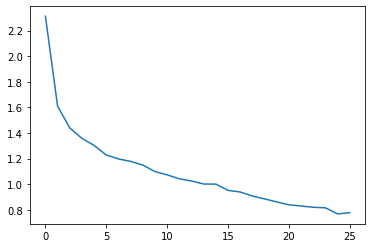

In [5]:
#LOSS-GRAPH

#matplotlib plotting from source [4]
ypoints = np.array(lossArrayLE)
plt.plot(ypoints)
plt.show
#End of source [4]
#source [4] : https://www.w3schools.com/python/matplotlib_plotting.asp

In [6]:
#JECNet



#CIFAR10 Dataset
#Training and Testing dataset/loader, from source [1]
trainset = torchvision.datasets.CIFAR10(root='../../data', train = True, transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()]), download = True)

testset = torchvision.datasets.CIFAR10(root='../../data', train = False, transform = transforms.Compose([transforms.Resize(32),transforms.ToTensor()]))

#loader
trainloader = torch.utils.data.DataLoader(dataset = trainset, batch_size = 4, shuffle = True)

testloader = torch.utils.data.DataLoader(dataset = testset, batch_size = 4, shuffle = False)

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Network, implementation carried out by myself
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 36, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(36, 180, 3)
        self.conv3 = nn.Conv2d(180, 540, 4)
        self.pool2 = nn.MaxPool2d(2, 2)
    
        self.fc1 = nn.Linear(540*5*5, 1024)
        self.fc2 = nn.Linear(1024, 1024)
    
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool2(F.relu(self.conv3(x)))
        
        x = x.view(x.size(0), 540*5*5)
        
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#pushing network to device (GPU) from source [2]
jecnet = Net().to(device)
#End of source [2]
#source [2] : https://stackoverflow.com/questions/50954479/using-cuda-with-pytorch

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(jecnet.parameters(), lr=0.001, momentum=0.9)

#End of source [1] 
#source [1] : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#what-about-data

Files already downloaded and verified


In [7]:
#Initialising optimiser, learning rate, from source [1]

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(jecnet.parameters(), lr=0.001, momentum = 0.9)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(jecnet.parameters(), lr=0.01, momentum = 0.9)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(jecnet.parameters(), lr=0.0001, momentum = 0.9)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.ADAM(jecnet.parameters(), lr=0.001)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSProp(jecnet.parameters(), lr=0.001)

#End of source [1] 
#source [1] : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#what-about-data

In [8]:
#Training JECNet-5
lossArrayJEC = []
#Array used to plot graph, plotting at each epoch.

#Training network, from source [1]
for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = jecnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics, altered by me to print the first training loss
        # and add certain results to an array for plotting.
        running_loss += loss.item()
        if epoch == 0 and i == 1:
          print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i, running_loss / 2))
          lossArrayJEC.append(running_loss/2)
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            if i == 11999:
              lossArrayJEC.append(running_loss/2000)
            running_loss = 0.0

print('Finished Training')
#End of source [1] 
#source [1] : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#what-about-data
print(lossArrayJEC)

[1,     1] loss: 6.919
[1,  2000] loss: 2.403
[1,  4000] loss: 1.922
[1,  6000] loss: 1.691
[1,  8000] loss: 1.587
[1, 10000] loss: 1.461
[1, 12000] loss: 1.389
[2,  2000] loss: 1.270
[2,  4000] loss: 1.224
[2,  6000] loss: 1.167
[2,  8000] loss: 1.137
[2, 10000] loss: 1.084
[2, 12000] loss: 1.040
[3,  2000] loss: 0.921
[3,  4000] loss: 0.915
[3,  6000] loss: 0.908
[3,  8000] loss: 0.884
[3, 10000] loss: 0.869
[3, 12000] loss: 0.850
[4,  2000] loss: 0.698
[4,  4000] loss: 0.680
[4,  6000] loss: 0.689
[4,  8000] loss: 0.688
[4, 10000] loss: 0.694
[4, 12000] loss: 0.668
[5,  2000] loss: 0.477
[5,  4000] loss: 0.476
[5,  6000] loss: 0.493
[5,  8000] loss: 0.513
[5, 10000] loss: 0.521
[5, 12000] loss: 0.508
[6,  2000] loss: 0.288
[6,  4000] loss: 0.307
[6,  6000] loss: 0.321
[6,  8000] loss: 0.316
[6, 10000] loss: 0.332
[6, 12000] loss: 0.360
[7,  2000] loss: 0.142
[7,  4000] loss: 0.158
[7,  6000] loss: 0.169
[7,  8000] loss: 0.178
[7, 10000] loss: 0.196
[7, 12000] loss: 0.212
[8,  2000] 

In [ ]:
#Save JECNet-5 state from source [3]
torch.save(jecnet.state_dict(),'JECNet.pt')
#End of source [3]
#source [3] : https://pytorch.org/docs/stable/notes/serialization.html

<function matplotlib.pyplot.show>

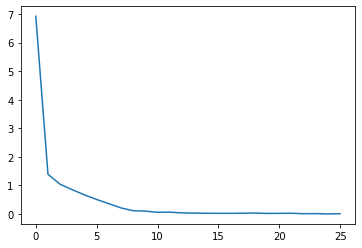

In [9]:
#LOSS-GRAPH

#matplotlib plotting from source [4]
ypoints = np.array(lossArrayJEC)
plt.plot(ypoints)
plt.show
#End of source [4]
#source [4] : https://www.w3schools.com/python/matplotlib_plotting.asp

In [10]:
#AlexNet/ImageNet


#CIFAR10 Dataset
#Training and Testing dataset/loader, from source [1]
trainset = torchvision.datasets.CIFAR10(root='../../data', train = True, transform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor()]), download = True)

testset = torchvision.datasets.CIFAR10(root='../../data', train = False, transform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224),transforms.ToTensor()]))

#loader
trainloader = torch.utils.data.DataLoader(dataset = trainset, batch_size = 4, shuffle = True)

testloader = torch.utils.data.DataLoader(dataset = testset, batch_size = 4, shuffle = False)

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Network, implementation carried out by myself
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 96, 11, stride = 4)
        self.pool1 = nn.MaxPool2d(3, 2)
        
        self.conv2 = nn.Conv2d(96, 256, 5)
        self.pool2 = nn.MaxPool2d(3, 2)

        self.conv3 = nn.Conv2d(256, 384, 3)
        self.conv4 = nn.Conv2d(384, 384, 3)
        self.conv5 = nn.Conv2d(384, 256, 3)
        self.pool3 = nn.MaxPool2d(3, 2)
    
        self.fc1 = nn.Linear(256, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 1000)
    
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool3(F.relu(self.conv5(x)))
        
        x = x.view(x.size(0), -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#pushing network to device (GPU) from source [2]
alnet = Net().to(device)
#End of source [2]
#source [2] : https://stackoverflow.com/questions/50954479/using-cuda-with-pytorch

#End of source [1] 
#source [1] : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#what-about-data

Files already downloaded and verified


In [11]:
#Initialising optimiser, learning rate, from source [1]

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alnet.parameters(), lr=0.001, momentum = 0.9)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alnet.parameters(), lr=0.01, momentum = 0.9)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alnet.parameters(), lr=0.0001, momentum = 0.9)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.ADAM(alnet.parameters(), lr=0.001)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSProp(alnet.parameters(), lr=0.001)

#End of source [1] 
#source [1] : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#what-about-data

In [12]:
#Training AlexNet/ImageNet

#Training network, from source [1]
lossArrayAL = []
#Array used to plot graph, plotting at each epoch.

for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = alnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics, altered by me to print the first training loss
        # and add certain results to an array for plotting.
        running_loss += loss.item()
        if epoch == 0 and i == 1:
          print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i, running_loss / 2))
          lossArrayAL.append(running_loss/2)
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            if i == 11999:
              lossArrayAL.append(running_loss/2000)
            running_loss = 0.0

print('Finished Training')
#End of source [1] 
#source [1] : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#what-about-data
print(lossArrayAL)

[1,     1] loss: 6.891
[1,  2000] loss: 2.791
[1,  4000] loss: 2.302
[1,  6000] loss: 2.104
[1,  8000] loss: 2.016
[1, 10000] loss: 1.941
[1, 12000] loss: 1.865
[2,  2000] loss: 1.766
[2,  4000] loss: 1.682
[2,  6000] loss: 1.621
[2,  8000] loss: 1.577
[2, 10000] loss: 1.528
[2, 12000] loss: 1.454
[3,  2000] loss: 1.392
[3,  4000] loss: 1.372
[3,  6000] loss: 1.336
[3,  8000] loss: 1.305
[3, 10000] loss: 1.272
[3, 12000] loss: 1.243
[4,  2000] loss: 1.145
[4,  4000] loss: 1.121
[4,  6000] loss: 1.088
[4,  8000] loss: 1.115
[4, 10000] loss: 1.094
[4, 12000] loss: 1.065
[5,  2000] loss: 0.947
[5,  4000] loss: 0.952
[5,  6000] loss: 0.963
[5,  8000] loss: 0.966
[5, 10000] loss: 0.947
[5, 12000] loss: 0.927
[6,  2000] loss: 0.782
[6,  4000] loss: 0.821
[6,  6000] loss: 0.827
[6,  8000] loss: 0.818
[6, 10000] loss: 0.824
[6, 12000] loss: 0.844
[7,  2000] loss: 0.683
[7,  4000] loss: 0.714
[7,  6000] loss: 0.701
[7,  8000] loss: 0.708
[7, 10000] loss: 0.716
[7, 12000] loss: 0.729
[8,  2000] 

In [ ]:
#Save AlexNet/ImageNet state from source [3]
torch.save(alnet.state_dict(),'ImageNet.pt')
#End of source [3]
#source [3] : https://pytorch.org/docs/stable/notes/serialization.html

<function matplotlib.pyplot.show>

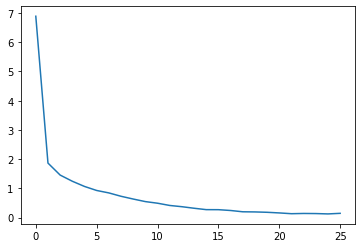

In [13]:
#LOSS-GRAPH

#matplotlib plotting from source [4]
ypoints = np.array(lossArrayAL)
plt.plot(ypoints)
plt.show
#End of source [4]
#source [4] : https://www.w3schools.com/python/matplotlib_plotting.asp

<function matplotlib.pyplot.show>

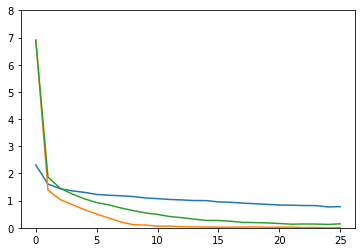

In [14]:
#COMPARISON LOSS-GRAPH

#matplotlib plotting from source [4]
plt.plot(np.array(lossArrayLE))
plt.plot(np.array(lossArrayJEC))
plt.plot(np.array(lossArrayAL))

#limit height to 8 due to some results obtained from certain networks from source [5]
plt.ylim(0,8)
#End of source [5]
#source [5] : https://stackoverflow.com/questions/45699759/how-do-you-limit-the-y-axis-height-in-matplotlib

plt.show
#End of source [4]
#source [4] : https://www.w3schools.com/python/matplotlib_plotting.asp

In [ ]:
#Load network from local directory to run over test set, from source [3]
net = Net()
net.load_state_dict(torch.load("LeNet.pt", map_location=torch.device('cpu')))
#End of source [3]
#source [3] : https://pytorch.org/docs/stable/notes/serialization.html

In [17]:
#Using the network on the testset from source [1]
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
#prints average of accuracy across each 10 classes
#End of source [1] 
#source [1] : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#what-about-data

Accuracy of the network on the 10000 test images: 70 %
